In [1]:
# This script shows how to predict stock prices using a basic RNN
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [7]:
# train Parameters
seq_length = 7
data_dim = 5
output_dim = 1
learning_rate = 0.01
iterations = 500

# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered

# train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:] # Index from [train_size - seq_length] to utilize past sequence

# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [8]:
# bild datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        x = time_series[i:i + seq_length, :]
        y = time_series[i + seq_length, [-1]] # Next close price
        print(x, "->", y)
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

print(trainX.shape)  # (505, 7, 5)
print(trainY.shape)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.13714161 0.15347214 0.15819624 0.14211706 0.16481462]] -> [0.19169395]
[[0.11747605 0.13186556 0.12765957 0.20712557 0.14075166]
 [0.12161618 0.13479168 0.15053518 0.11579278 0.1452226 ]
 [0.11733795 0.11522658 0.11974807 0.19215739 0.11089737]
 [0.10678059 0.13649309 0.13224183 0.14979833 0.15078511]
 [0.14787148 0.14772173 0.1650876  0.16463207 0.14582117]
 [0.13714161 0.15347214 0.15819624 0.14211706 0.16481462]
 [0.15991222 0.18709017 0.1885539  0.37437483 0.19169395]] -> [0.25527513]
[[0.12161618 0.13479168 0.15053518 0.11579278 0.1452226 ]
 [0.11733795 0.11522658 0.11974807 0.19215739 0.11089737]
 [0.10678059 0.13649309 0.13224183 0.14979833 0.15078511]
 [0.14787148 0.14772173 0.1650876  0.16463207 0.14582117]
 [0.13714161 0.15347214 0.15819624 0.14211706 0.16481462]
 [0.15991222 0.18709017 0.1885539  0.37437483 0.19169395]
 [0.24650991 0.25575524 0.24948395 0.44139105 0.25527513]] -> [0.22115211]
[[0.11733795 0.11522658 0.11974807 0.19215739 0.11089737]
 [0.10678059 0.136493

 [0.16647695 0.1778956  0.18250869 0.27889077 0.15202208]] -> [0.16534255]
[[0.27282543 0.31323317 0.32245296 0.12540301 0.29926518]
 [0.27264541 0.29572635 0.30191562 0.1341993  0.29872778]
 [0.28775254 0.2987326  0.32729943 0.11712853 0.30261025]
 [0.26323346 0.26142075 0.24218202 0.26025457 0.2514783 ]
 [0.22570604 0.21526681 0.15247254 0.52487001 0.14013479]
 [0.16647695 0.1778956  0.18250869 0.27889077 0.15202208]
 [0.16425888 0.17960523 0.17402746 0.16392404 0.16534255]] -> [0.17442218]
[[0.27264541 0.29572635 0.30191562 0.1341993  0.29872778]
 [0.28775254 0.2987326  0.32729943 0.11712853 0.30261025]
 [0.26323346 0.26142075 0.24218202 0.26025457 0.2514783 ]
 [0.22570604 0.21526681 0.15247254 0.52487001 0.14013479]
 [0.16647695 0.1778956  0.18250869 0.27889077 0.15202208]
 [0.16425888 0.17960523 0.17402746 0.16392404 0.16534255]
 [0.16821532 0.16834655 0.18052159 0.1115004  0.17442218]] -> [0.20076453]
[[0.28775254 0.2987326  0.32729943 0.11712853 0.30261025]
 [0.26323346 0.261420

In [9]:
tf.model = tf.keras.Sequential();
tf.model.add(tf.keras.layers.LSTM(units=1, input_shape=(seq_length, data_dim)))
tf.model.add(tf.keras.layers.Dense(units=output_dim, activation='tanh'))
tf.model.summary()

tf.model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=learning_rate))
tf.model.fit(trainX, trainY, epochs=iterations)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1)                 28        
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
16/16 [==============================] - 1s 3ms/step - loss: 0.2044
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1048
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0517
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0321
Epoch 6/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 7/500
16/16 [=======================

16/16 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 95/500
16/16 [==============================] - ETA: 0s - loss: 0.001 - 0s 2ms/step - loss: 0.0015
Epoch 96/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 97/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 98/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 99/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 100/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 101/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 102/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 103/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 104/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 105/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 106/5

16/16 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 194/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 195/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 196/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 197/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 198/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 199/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 200/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 201/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 202/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 203/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 204/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 205/500
16/16 [=========

16/16 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 294/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 295/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 296/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 297/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 298/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 299/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 300/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 301/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 302/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 303/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 304/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 305/500
16/16 [=========

16/16 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 393/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 394/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 395/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 396/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 397/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 398/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 399/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 400/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 401/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 402/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 403/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 404/500
16/16 [=========

16/16 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 492/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 493/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 494/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 495/500
16/16 [==============================] - 0s 2ms/step - loss: 9.6770e-04
Epoch 496/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 497/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 498/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 499/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 500/500
16/16 [==============================] - 0s 2ms/step - loss: 9.5794e-04


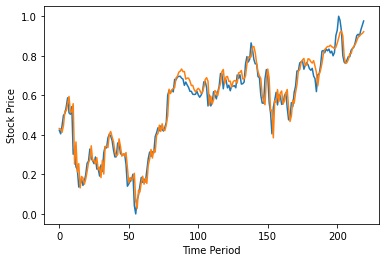

In [10]:
# Test step
test_predict = tf.model.predict(testX)

# Plot predictions
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()